In [1]:
# import libraties
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data file
ratings = pd.read_csv('beer_data.csv', encoding='latin-1')

In [2]:
ratings.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


from info here we can see that there are 475984 rows and 3 columns, also we can see that review_profilename has 475884 non-null values, this means there are 100 blanks.

In [4]:
# Checking Blanks in each columns
ratings.isnull().sum(axis=0)

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

In [5]:
ratings = ratings.dropna()  #drop null values from DataFrame
print(type(ratings))

<class 'pandas.core.frame.DataFrame'>


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475884 non-null int64
review_profilename    475884 non-null object
review_overall        475884 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


DataFrame ratings now have 475884 entries in all 3 columns, looks Good!

In [7]:
#Checking duplicates based on two cloumns
ratings.duplicated(['beer_beerid','review_profilename']).sum()

1422

In [8]:
# Dropping Duplicates with keepfirst
ratings = ratings.drop_duplicates(['beer_beerid','review_profilename'],keep='first')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474462 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           474462 non-null int64
review_profilename    474462 non-null object
review_overall        474462 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [10]:
# Checking Describe
ratings.describe()

,beer_beerid,review_overall
count,474462.000000,474462.000000
mean,21674.478038,3.814274
std,21798.233764,0.720484
min,3.000000,0.000000
25%,1717.000000,3.500000
50%,13896.000000,4.000000
75%,39417.000000,4.500000
max,77317.000000,5.000000


## 1. Data preparation

Choose only those beers that have at least N number of reviews.

1.Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.

In [11]:
#checking review counts on Beerid
ratings_beerid_counts = pd.DataFrame(ratings.beer_beerid.value_counts(sort=True))

In [12]:
print(ratings_beerid_counts.shape)
print(ratings_beerid_counts.head())
print(ratings_beerid_counts.tail())

(40304, 1)
      beer_beerid
2093          977
412           966
1904          902
1093          840
92            812
       beer_beerid
31461            1
53362            1
57460            1
42666            1
69794            1


There are 40304 unique beerid in total, which is 8% (40304/475984) of the total data. beerid 2093 has recieved maximum review 987 times.

We also notice that bottom 5 beerid have 1 review so we will check the the data where we have recieved single review at later stage.

Text(0.5, 0, 'Number of Reviews')

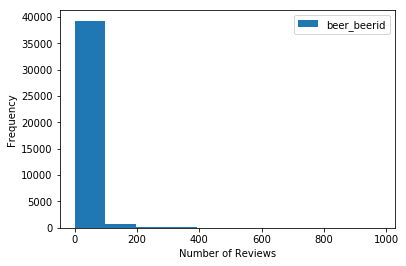

In [13]:
ratings_beerid_counts.plot.hist(bins=10)
plt.xlabel('Number of Reviews')

We can see that majority of the beerid lies between 0-100 review counts (beerid's rated number of times) 

or Large number of beers have review between 0-100

In [14]:
#Checking Beerid which have recieved less than or equal 100 review
beerid_counts = pd.DataFrame(ratings_beerid_counts[ratings_beerid_counts<=100])

Text(0.5, 0, 'Number of Reviews')

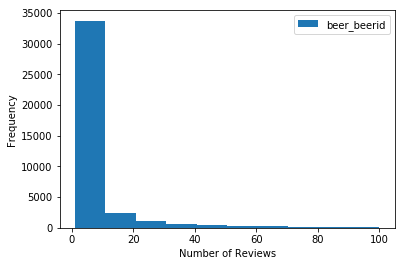

In [15]:
beerid_counts.plot.hist(bins=10)
plt.xlabel('Number of Reviews')

We clearly see that there are large number of beerid's which are in between 0-50 review, (we will consider this while removing beers that have an extremely low number of ratings.)

In [16]:
#Checking Beerid which have recieved 1 review
beerid_counts_1 = pd.DataFrame(ratings_beerid_counts[ratings_beerid_counts==1]).sum()
print(beerid_counts_1)

beer_beerid    18080.0
dtype: float64


There are 18056 beerid which have recieved 1 review

In [17]:
#Checking Beerid which have recieved 1-50 review
beerid_counts_2 = pd.DataFrame(ratings_beerid_counts[ratings_beerid_counts<=50]).sum()
print(beerid_counts_2)

beer_beerid    180265.0
dtype: float64


There are 180265 beerid which have recieved 50 or less review which is 38% of the data (180347/475984), we can remove these to filter out beers that have an extremely low number of ratings.

In [18]:
beers = ratings.groupby('beer_beerid')['review_overall'].count().reset_index()
print(beers.count())

beers = beers.sort_values('review_overall', ascending=False)

beers_count_subset = beers[beers.review_overall >= 50]
beers_count_subset.info()

beer_beerid       40304
review_overall    40304
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1574 to 39270
Data columns (total 2 columns):
beer_beerid       2064 non-null int64
review_overall    2064 non-null int64
dtypes: int64(2)
memory usage: 48.4 KB


### Checking review by user

Lets check review by user (Counts) below

In [19]:
profile_counts = pd.DataFrame(ratings.review_profilename.value_counts(sort=True))

In [20]:
print(profile_counts.shape)
profile_counts.head()

(22497, 1)


,review_profilename
northyorksammy,1842
mikesgroove,1373
BuckeyeNation,1336
Thorpe429,1072
ChainGangGuy,1046


There are 22497 unique users in total, which is 5% (40304/475984) of the total data. northyorksammy has given maximum review 1842.

Text(0.5, 0, 'Number of Reviews')

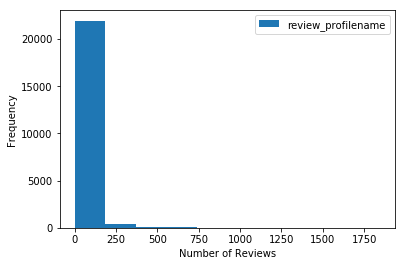

In [21]:
profile_counts.plot.hist(bins=10)
plt.xlabel('Number of Reviews')

In users review counts We see that majority of the Users lies between 0-125 review counts (users rated number of times) 

In [22]:
#let deep dive further into users review less than or equal 125
profile_counts_1 = pd.DataFrame(profile_counts[profile_counts<=125])

Text(0.5, 0, 'Number of Reviews')

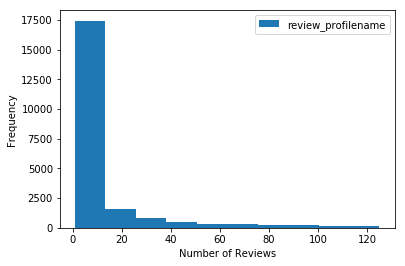

In [23]:
profile_counts_1.plot.hist(bins=10)
plt.xlabel('Number of Reviews')

We clearly see that there are large number of users which have given 1-30 review, (we will consider this while removing beers that have an extremely low number of ratings.)

In [24]:
users = ratings.groupby('review_profilename')['review_overall'].count().reset_index()
users_count_subset = users[users.review_overall >= 30]

users_count_subset = users_count_subset.sort_values('review_overall', ascending=False)

users_count_subset.head(5)

,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


In [25]:
#Creating new Data Frame after applying filter on beer review >= 50 and user review >=30
ratings_df = ratings.merge(beers_count_subset,how='inner',on='beer_beerid')
ratings_df = ratings_df.merge(users_count_subset,how='inner',on='review_profilename')

In [26]:
# Post merging data based on beer review >= 50 and user review >=30, renaming columns
ratings_df.rename(columns={'review_overall_x' : 'rating','review_overall_y':'beers_reviews',
                           'review_overall' : 'users_reviews'},
                  inplace = True)

In [27]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230088 entries, 0 to 230087
Data columns (total 5 columns):
beer_beerid           230088 non-null int64
review_profilename    230088 non-null object
rating                230088 non-null float64
beers_reviews         230088 non-null int64
users_reviews         230088 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 10.5+ MB


In [28]:
ratings_df.head()

,beer_beerid,review_profilename,rating,beers_reviews,users_reviews
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518


In [29]:
#Checking dataframe users_reviews==518
ratings_df[ratings_df.users_reviews==518]

,beer_beerid,review_profilename,rating,beers_reviews,users_reviews
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518
5,34146,Brent,4.0,347,518
6,17538,Brent,4.0,332,518
7,48911,Brent,4.0,153,518
8,7463,Brent,3.5,352,518
9,20478,Brent,2.5,205,518


## 2. Data exploration

1. What are the unique values of ratings?

In [30]:
ratings_df.rating.value_counts(ascending=True)

1.0     1120
1.5     1343
2.0     4474
2.5     7012
5.0    13081
3.0    21189
3.5    42543
4.5    51086
4.0    88240
Name: rating, dtype: int64

2. Visualise the rating values and notice:

The average beer ratings

In [31]:
# Visualise the rating values and notice:
# The average beer ratings :

avg_beer_ratings = ratings_df.groupby('beer_beerid')['rating'].agg(['mean']).reset_index()
avg_beer_ratings.head()

,beer_beerid,mean
0,5,3.532609
1,6,3.707895
2,7,3.272109
3,10,3.859116
4,14,3.911765


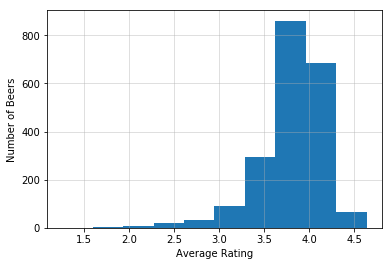

In [32]:
plt.hist(avg_beer_ratings['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

In [33]:
#average beer ratings on orignal data set (full data)_ratings to check analysis is inline

beer_ratings_Avg_fulldata = ratings.groupby('beer_beerid')['review_overall'].agg(['mean']).reset_index()
beer_ratings_Avg_fulldata.head()

,beer_beerid,mean
0,3,4.250000
1,4,3.666667
2,5,3.553097
3,6,3.711462
4,7,3.317073


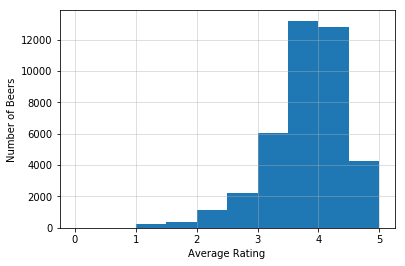

In [34]:
plt.hist(beer_ratings_Avg_fulldata['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

The average user ratings

In [35]:
# The average user ratings :

avg_user_ratings = ratings_df.groupby('review_profilename')['rating'].agg(['mean']).reset_index()
avg_user_ratings.head()

,review_profilename,mean
0,0110x011,4.333333
1,05Harley,4.116667
2,100floods,4.155172
3,1759Girl,3.725000
4,1fastz28,3.875000


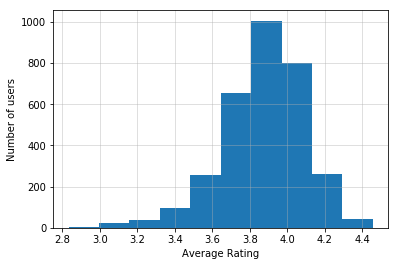

In [36]:
plt.hist(avg_user_ratings['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of users')
plt.show()

In [37]:
#average user ratings on orignal data set (full data)_ratings to check analysis is inline

user_ratings_Avg_fulldata = ratings.groupby('review_profilename')['review_overall'].agg(['mean']).reset_index()
user_ratings_Avg_fulldata.head()

,review_profilename,mean
0,0110x011,4.285714
1,01Ryan10,5.000000
2,03SVTCobra,1.000000
3,04101Brewer,4.000000
4,05Harley,4.158537


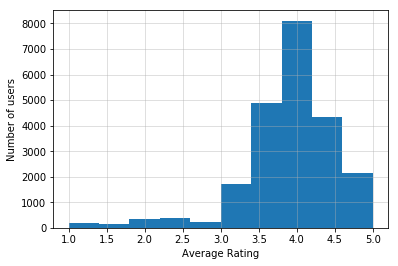

In [38]:
plt.hist(user_ratings_Avg_fulldata['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of users')
plt.show()

The average number of ratings given to the beers

In [39]:
avg_beer_reviews = ratings_df.groupby('beer_beerid')['beers_reviews'].agg(['mean']).reset_index()
avg_beer_reviews.head()

,beer_beerid,mean
0,5,113
1,6,253
2,7,205
3,10,218
4,14,59


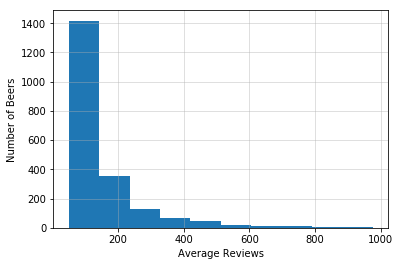

In [40]:
plt.hist(avg_beer_reviews['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Reviews')
plt.ylabel('Number of Beers')
plt.show()

The average number of ratings given by the users

In [41]:
avg_user_reviews = ratings_df.groupby('review_profilename')['users_reviews'].agg(['mean']).reset_index()
avg_user_reviews.head()

,review_profilename,mean
0,0110x011,35
1,05Harley,41
2,100floods,44
3,1759Girl,73
4,1fastz28,124


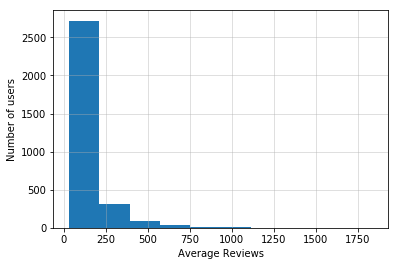

In [42]:
plt.hist(avg_user_reviews['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Reviews')
plt.ylabel('Number of users')
plt.show()

## 3. Recommendation Models

1. Divide your data into training and testing dataset.

In [43]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings_df, test_size=0.30, random_state=31)

### 2.Build user-based and item-based models.

In [44]:
# pivot ratings into Beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [45]:
print(train.shape)
print(test.shape)

(161061, 5)
(69027, 5)


In [46]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset

These dataset will be used for prediction and evaluation.

Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction.
Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [47]:
dummy_train = train.copy()
dummy_test = test.copy()

In [48]:
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [49]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [50]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [51]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User Similarity Matrix

Using Cosine Similarity

In [52]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.0602183  ... 0.         0.         0.        ]
 [0.         1.         0.10346685 ... 0.03699533 0.0236273  0.        ]
 [0.0602183  0.10346685 1.         ... 0.0406859  0.04209458 0.        ]
 ...
 [0.         0.03699533 0.0406859  ... 1.         0.         0.        ]
 [0.         0.0236273  0.04209458 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [53]:
user_correlation.shape

(3176, 3176)

### Using adjusted Cosine
Here, not removing the NaN values and calculating the mean only for the beers rated by the use

In [54]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [55]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the beers for each user aroung 0 mean

In [56]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [57]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.414286,NaN,0.085714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.414286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [58]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.         -0.06414558 ...  0.          0.
   0.        ]
 [ 0.          1.         -0.00228504 ... -0.05790255  0.06023922
   0.        ]
 [-0.06414558 -0.00228504  1.         ... -0.03519429  0.00183073
   0.        ]
 ...
 [ 0.         -0.05790255 -0.03519429 ...  1.          0.
   0.        ]
 [ 0.          0.06023922  0.00183073 ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


### Prediction
Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [59]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.06023922,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00183073,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.06023922, 0.00183073, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [60]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[0.60740569, 1.72279843, 1.36537555, ..., 0.62420766, 2.78695303,
        0.99231436],
       [1.64187597, 2.19901147, 0.68375015, ..., 0.77148987, 2.04906253,
        0.87085684],
       [0.50868217, 1.82480268, 1.04838097, ..., 0.4432223 , 1.66992617,
        1.01367289],
       ...,
       [5.4615181 , 9.28403854, 6.24694338, ..., 1.13753439, 2.05371077,
        2.43409095],
       [1.94987669, 7.03871264, 4.32649666, ..., 1.48588393, 3.63541061,
        2.413668  ],
       [2.79919408, 5.30058669, 4.10148393, ..., 0.7447872 , 1.28456455,
        1.13771762]])

In [61]:
user_predicted_ratings.shape

(3176, 2064)

In [62]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.607406,1.722798,1.365376,2.133627,0.369895,0.383252,2.128028,1.836918,2.817660,1.975254,...,3.390042,0.677360,0.326128,0.253216,0.442418,0.547199,0.265393,0.624208,2.786953,0.992314
05Harley,1.641876,2.199011,0.683750,4.119564,1.142683,0.498070,2.202979,2.498159,6.628212,3.453936,...,2.962885,1.561487,1.674791,1.224707,1.361091,0.912850,0.302531,0.771490,2.049063,0.870857
100floods,0.508682,1.824803,1.048381,2.556826,0.508363,0.473822,2.041114,0.524179,4.925649,2.787559,...,2.772751,1.099367,0.921139,0.799246,0.928896,0.406420,0.375718,0.443222,1.669926,1.013673
1759Girl,3.654447,5.765699,5.281095,5.064425,1.357946,1.871067,5.197184,4.365944,13.376856,11.673933,...,8.238620,1.740618,2.625025,1.563181,0.776449,2.044254,0.757676,1.002973,3.981609,2.350628
1fastz28,4.260667,0.000000,4.846008,0.000000,1.676340,2.468645,7.305227,6.270055,17.198941,12.667486,...,6.401570,2.171791,0.000000,2.319006,2.686793,2.116601,1.817929,1.473303,3.677687,3.638288


### Finding the top 5 recommendation for the user 1

In [63]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
7971    13.885626
412     13.780658
1093    12.523484
731     12.490436
4083    12.247701
Name: 05Harley, dtype: float64

### 3. Determine how similar the first ten users are with each other and visualize it

In [64]:
top_10_user = user_final_rating.iloc[:10,:10]
top_10_user

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,0.607406,1.722798,1.365376,2.133627,0.369895,0.383252,2.128028,1.836918,2.817660,1.975254
05Harley,1.641876,2.199011,0.683750,4.119564,1.142683,0.498070,2.202979,2.498159,6.628212,3.453936
100floods,0.508682,1.824803,1.048381,2.556826,0.508363,0.473822,2.041114,0.524179,4.925649,2.787559
1759Girl,3.654447,5.765699,5.281095,5.064425,1.357946,1.871067,5.197184,4.365944,13.376856,11.673933
1fastz28,4.260667,0.000000,4.846008,0.000000,1.676340,2.468645,7.305227,6.270055,17.198941,12.667486
32hoss32,5.463102,12.542396,8.103772,10.358917,3.220584,3.420030,11.803124,13.588931,20.695294,15.317890
3Vandoo,3.542465,8.935916,6.509780,7.186134,2.922117,2.722449,8.319834,6.465149,15.520371,15.943180
4000qtrap,0.863029,3.192234,2.678842,5.016206,0.555923,1.190761,3.205879,3.104515,7.042174,4.860710
4DAloveofSTOUT,1.031059,2.927596,1.300396,2.913080,1.051519,0.469621,2.239036,2.239323,4.633891,2.483707


In [65]:
top_10_user_T = top_10_user.transpose()
top_10_user_T

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
beer_beerid,,,,,,,,,,
5,0.607406,1.641876,0.508682,3.654447,4.260667,5.463102,3.542465,0.863029,1.031059,1.399489
6,1.722798,2.199011,1.824803,5.765699,0.000000,12.542396,8.935916,3.192234,2.927596,3.298513
7,1.365376,0.683750,1.048381,5.281095,4.846008,8.103772,6.509780,2.678842,1.300396,3.264341
10,2.133627,4.119564,2.556826,5.064425,0.000000,10.358917,7.186134,5.016206,2.913080,3.318713
14,0.369895,1.142683,0.508363,1.357946,1.676340,3.220584,2.922117,0.555923,1.051519,1.038088
15,0.383252,0.498070,0.473822,1.871067,2.468645,3.420030,2.722449,1.190761,0.469621,1.649017
17,2.128028,2.202979,2.041114,5.197184,7.305227,11.803124,8.319834,3.205879,2.239036,2.685069
19,1.836918,2.498159,0.524179,4.365944,6.270055,13.588931,6.465149,3.104515,2.239323,3.551101
30,2.817660,6.628212,4.925649,13.376856,17.198941,20.695294,15.520371,7.042174,4.633891,8.617721


In [66]:
top_10_user_T.corr(method ='pearson')

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
review_profilename,,,,,,,,,,
0110x011,1.000000,0.826983,0.836336,0.786875,0.584087,0.935757,0.820637,0.937759,0.916493,0.769789
05Harley,0.826983,1.000000,0.916609,0.817613,0.659148,0.848956,0.780358,0.912185,0.930229,0.808542
100floods,0.836336,0.916609,1.000000,0.892129,0.695038,0.836225,0.872343,0.930956,0.903714,0.857482
1759Girl,0.786875,0.817613,0.892129,1.000000,0.850593,0.892964,0.975106,0.878868,0.804835,0.979605
1fastz28,0.584087,0.659148,0.695038,0.850593,1.000000,0.739882,0.790165,0.648851,0.563072,0.848842
32hoss32,0.935757,0.848956,0.836225,0.892964,0.739882,1.000000,0.907143,0.912754,0.922537,0.888501
3Vandoo,0.820637,0.780358,0.872343,0.975106,0.790165,0.907143,1.000000,0.877864,0.810574,0.964511
4000qtrap,0.937759,0.912185,0.930956,0.878868,0.648851,0.912754,0.877864,1.000000,0.924094,0.884601
4DAloveofSTOUT,0.916493,0.930229,0.903714,0.804835,0.563072,0.922537,0.810574,0.924094,1.000000,0.783000


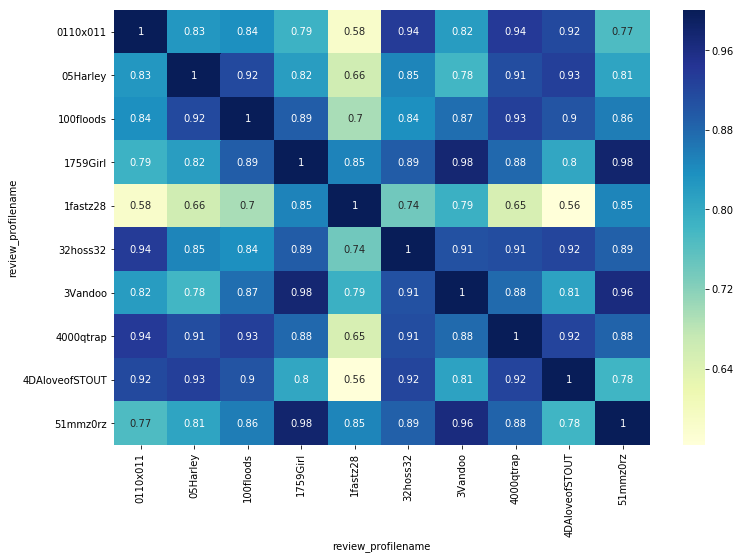

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(top_10_user.T.corr(method ='pearson'),annot=True,cmap='YlGnBu')
plt.show()

### Item Based Similarity

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different beer ID. In the user based similarity, we had taken mean for each user intead of each beer.

In [68]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T

beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [70]:
df_subtracted.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.209559,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,0.153226,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value.

In [71]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.04400353  0.10450266 ...  0.          0.01444095
   0.        ]
 [-0.04400353  1.          0.09372582 ...  0.0850787   0.0028846
   0.        ]
 [ 0.10450266  0.09372582  1.         ...  0.0035514   0.00416595
  -0.00307617]
 ...
 [ 0.          0.0850787   0.0035514  ...  1.         -0.00953562
   0.02076853]
 [ 0.01444095  0.0028846   0.00416595 ... -0.00953562  1.
  -0.01370386]
 [ 0.          0.         -0.00307617 ...  0.02076853 -0.01370386
   1.        ]]


In [72]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.10450266, ..., 0.        , 0.01444095,
        0.        ],
       [0.        , 1.        , 0.09372582, ..., 0.0850787 , 0.0028846 ,
        0.        ],
       [0.10450266, 0.09372582, 1.        , ..., 0.0035514 , 0.00416595,
        0.        ],
       ...,
       [0.        , 0.0850787 , 0.0035514 , ..., 1.        , 0.        ,
        0.02076853],
       [0.01444095, 0.0028846 , 0.00416595, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02076853, 0.        ,
        1.        ]])

### Prediction

In [73]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.34235531, 0.75140313, 0.3725019 , ..., 0.4798347 , 0.51727737,
        0.77667071],
       [0.71201797, 0.61201673, 0.74136727, ..., 0.29537101, 0.96046555,
        0.70915081],
       [0.4610979 , 0.57293613, 0.84695463, ..., 0.44862372, 1.62539371,
        1.21536412],
       ...,
       [1.05588008, 1.64889637, 1.67259081, ..., 0.39409505, 0.7575991 ,
        1.69761257],
       [1.05237359, 1.68876966, 1.94192558, ..., 1.24434921, 1.03048876,
        1.72885155],
       [0.77920154, 0.98848806, 1.95106329, ..., 0.22335889, 0.2721665 ,
        0.45937481]])

In [74]:
item_predicted_ratings.shape

(3176, 2064)

In [75]:
dummy_train.shape

(3176, 2064)

### Filtering the rating only for the beers not rated by the user for recommendation

In [76]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.342355,0.751403,0.372502,0.373032,0.438093,0.606722,1.266867,0.346784,1.825658,0.633090,...,1.191960,0.412804,0.409965,0.477528,0.291183,0.658500,0.153989,0.479835,0.517277,0.776671
05Harley,0.712018,0.612017,0.741367,0.816150,1.197436,1.189673,0.377426,0.574105,1.825379,0.655822,...,0.852472,0.167492,0.283364,0.594851,0.426807,0.882157,1.132680,0.295371,0.960466,0.709151
100floods,0.461098,0.572936,0.846955,0.399168,0.330429,0.904166,0.991984,0.350883,1.398217,0.663469,...,0.914051,0.767967,1.061601,0.782607,0.977393,0.424092,1.789367,0.448624,1.625394,1.215364
1759Girl,1.030794,1.233836,1.835413,1.391103,0.720516,0.934950,1.466819,0.566264,1.926939,1.461998,...,0.786347,1.258554,1.002897,1.065330,0.618888,0.886222,1.026076,0.433305,1.075807,1.523836
1fastz28,2.173427,0.000000,3.898027,0.000000,3.264602,3.261925,3.998928,2.687456,2.711403,4.235729,...,3.086705,3.051129,0.000000,1.828889,1.196344,1.753731,3.142080,1.587389,1.649391,4.243231


### Top 5 prediction for the user -1

In [77]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
48194    2.632030
34363    2.451880
33894    2.384289
1504     2.347642
34094    2.344075
Name: 05Harley, dtype: float64

### 4.Compute and visualise the similarity between the first 10 beers.

In [78]:
top_10_beer = item_final_rating.iloc[:10,:10]
top_10_beer

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,0.342355,0.751403,0.372502,0.373032,0.438093,0.606722,1.266867,0.346784,1.825658,0.633090
05Harley,0.712018,0.612017,0.741367,0.816150,1.197436,1.189673,0.377426,0.574105,1.825379,0.655822
100floods,0.461098,0.572936,0.846955,0.399168,0.330429,0.904166,0.991984,0.350883,1.398217,0.663469
1759Girl,1.030794,1.233836,1.835413,1.391103,0.720516,0.934950,1.466819,0.566264,1.926939,1.461998
1fastz28,2.173427,0.000000,3.898027,0.000000,3.264602,3.261925,3.998928,2.687456,2.711403,4.235729
32hoss32,0.555701,1.089635,1.396297,1.516364,1.079436,1.042607,0.977324,0.606880,0.771947,0.924730
3Vandoo,1.076917,1.129220,1.027566,1.623240,2.466679,1.030707,1.227803,1.300322,1.259056,2.756709
4000qtrap,0.504887,1.506075,1.468067,1.167652,0.853308,1.690247,1.013523,0.892992,1.057554,1.249679
4DAloveofSTOUT,0.691417,0.668843,0.684541,0.898537,0.431441,0.628534,1.131348,0.557950,2.930775,1.123848


In [79]:
top_10_beer.corr(method ='pearson')

beer_beerid,5,6,7,10,14,15,17,19,30,31
beer_beerid,,,,,,,,,,
5,1.000000,-0.527641,0.895456,-0.301677,0.874808,0.834278,0.885416,0.930841,0.461833,0.940144
6,-0.527641,1.000000,-0.377643,0.828023,-0.378548,-0.458237,-0.561957,-0.474073,-0.652996,-0.389606
7,0.895456,-0.377643,1.000000,-0.309671,0.739887,0.919637,0.907421,0.874353,0.242460,0.825554
10,-0.301677,0.828023,-0.309671,1.000000,-0.122033,-0.444623,-0.527230,-0.326044,-0.519869,-0.197620
14,0.874808,-0.378548,0.739887,-0.122033,1.000000,0.786088,0.720470,0.930358,0.139877,0.928153
15,0.834278,-0.458237,0.919637,-0.444623,0.786088,1.000000,0.837635,0.918424,0.220441,0.803929
17,0.885416,-0.561957,0.907421,-0.527230,0.720470,0.837635,1.000000,0.875386,0.425382,0.852991
19,0.930841,-0.474073,0.874353,-0.326044,0.930358,0.918424,0.875386,1.000000,0.320251,0.965098
30,0.461833,-0.652996,0.242460,-0.519869,0.139877,0.220441,0.425382,0.320251,1.000000,0.330219


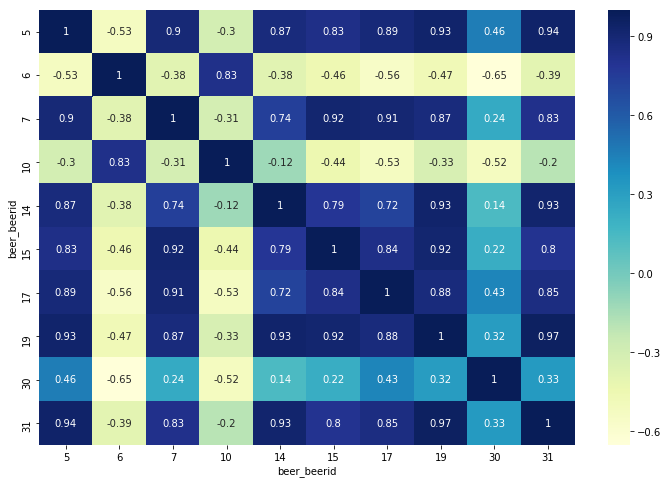

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(top_10_beer.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Evaluation
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the beers already rated by the user insead of predicting it for the beer not rated by the user.

### Using User Similarity

In [81]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.00000000e+00 -9.94756754e-03  0.00000000e+00 ...  8.12730982e-04
   6.02316422e-02  0.00000000e+00]
 [-9.94756754e-03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.12730982e-04  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   3.81129997e-03  0.00000000e+00]
 [ 6.02316422e-02  0.00000000e+00  0.00000000e+00 ...  3.81129997e-03
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [82]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.41939745, 0.2239049 , 0.79532046, ..., 0.54059044, 2.14354489,
        0.21766579],
       [0.36384749, 0.20596454, 0.60289483, ..., 1.26725901, 0.00927267,
        0.75379087],
       [0.07257225, 0.2557648 , 0.36255464, ..., 0.11783901, 0.15126308,
        0.01956389],
       ...,
       [1.39301769, 3.26215724, 1.17950817, ..., 1.32916552, 0.09780408,
        1.45608938],
       [0.77927749, 0.80168546, 0.31702962, ..., 0.18221054, 0.80894388,
        0.48848761],
       [0.71590046, 1.05053414, 0.59297741, ..., 0.        , 1.08198966,
        0.04651303]])

### Doing prediction for the beers rated by the user

In [83]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [84]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Compare the performance of the two models using test data and suggest the one that should be deployed.

#### Calculating the RMSE for only the beers rated by user. For RMSE, normalising the rating to (1,5) range.

In [85]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [86]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [87]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [88]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

1.8020010881328037


### Using Item similarity

In [89]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [90]:
test_item_correlation.shape

(2064, 2064)

In [91]:
test_beer_features.shape

(2064, 3174)

In [92]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [94]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [95]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.095085268824015


RMSE for user similarity is 1.80 and for Item based is 2.09, hence User Based model is Good for deployement.

### 6. Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

#### ----------------------User Based----------------------------

cokes

In [96]:
cokes = pd.DataFrame(user_final_rating[user_final_rating.index=='cokes']).T
cokes.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
412,30.135874
4083,28.686617
34,28.152674
1708,27.780130
695,27.569453


genog

In [97]:
genog = pd.DataFrame(user_final_rating[user_final_rating.index=='genog']).T
genog.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
412,30.424666
1093,30.370341
131,29.547832
2093,29.526754
1904,27.638449


giblet

In [98]:
giblet = pd.DataFrame(user_final_rating[user_final_rating.index=='giblet']).T
giblet.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
2093,39.699155
412,38.796605
92,37.226070
355,36.930561
1093,36.117622


#### ----------------------Item Based----------------------------

cokes

In [99]:
cokes_item = pd.DataFrame(item_final_rating[user_final_rating.index=='cokes']).T
cokes_item.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
3706,16.673912
20524,14.975975
53899,14.254801
7879,13.773010
30858,13.450961


genog

In [100]:
genog_item = pd.DataFrame(item_final_rating[user_final_rating.index=='genog']).T
genog_item.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
10301,6.070267
2361,6.051229
34313,5.725930
36179,5.650048
34484,5.433297


giblet

In [101]:
giblet_item = pd.DataFrame(item_final_rating[user_final_rating.index=='giblet']).T
giblet_item.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
573,3.799396
54413,3.686785
159,3.677000
1075,3.479484
3711,3.376210


Thank You!